# 2021.12.21 복습

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

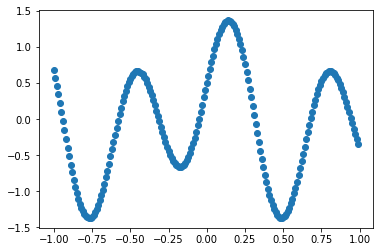

In [ ]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = np.sin(10*x) + 0.5 * np.cos(5*x)

plt.scatter(x, y)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

In [ ]:
index = int(len(x) * 0.8)
train_x, test_x = x[:index], x[index:]
train_y, test_y = y[:index], y[index:]

In [ ]:
model = Sequential()

model.add(Input(1))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(1))

model.compile(loss= 'mse', optimizer = 'Adam', metrics = ['mse'])

index = int(len(x) * 0.8)
hist = model.fit(train_x, train_y, epochs = 1000*10, batch_size = 128, validation_split =0.1, verbose = 0)

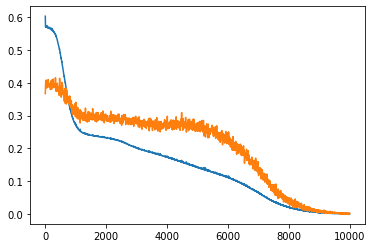

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

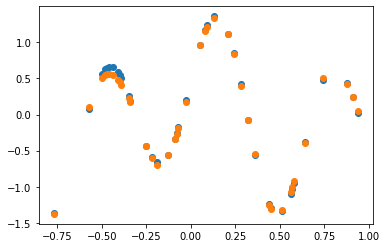

In [ ]:
y_ = model.predict(test_x)
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_)
plt.show()

# 다양한 입출력

# 정확한 값의 출력(회귀) : mse
# 분류 문제 : categorical_crossentropy, metrics =['accuracy']

## 2개입력 1개 출력

In [ ]:
x = np.ones((100,2))
x[:,0] = np.random.rand(100)
x[:,1] = np.random.rand(100)

y = np.sum(x, axis = 1)

array([1.75233132, 1.24386483, 1.27041022, 1.18757946, 0.80688095,
       0.44759306, 1.38559982, 0.97378371, 1.1153575 , 0.6292018 ,
       1.01732936, 0.22777472, 0.92857172, 0.91529679, 0.64319187,
       1.31049652, 0.73827769, 0.30251645, 1.63821333, 1.52824723,
       0.87394811, 0.93607112, 0.11824866, 1.15309697, 0.47238077,
       0.67934951, 1.46461749, 0.94447286, 0.96984691, 1.14844364,
       1.01196203, 1.43593674, 0.90341816, 1.10745804, 0.60800961,
       0.44758886, 0.45975417, 0.04822259, 0.10424678, 0.71452997,
       1.43591037, 0.36031744, 0.8499228 , 1.68660106, 1.38313147,
       1.70627992, 0.81104354, 1.36539976, 1.51538124, 0.10870245,
       0.68586049, 1.75962656, 1.1453348 , 1.62160555, 0.78551366,
       1.52778664, 1.05422488, 0.35490279, 0.97022864, 1.59768087,
       0.59499707, 0.56155148, 1.08090429, 1.38156547, 0.82223285,
       0.88879837, 0.99980011, 0.6037344 , 0.94356864, 0.76832088,
       1.20852932, 0.40960272, 1.11000068, 0.54726652, 0.53502

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                30        
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
elapsed : 44.14236378669739
2/2 [==============================] - 0s 6ms/step - loss: 6.1871e-04 - mae: 0.0195
loss= 0.0006187063991092145
mae= 0.01953709125518799


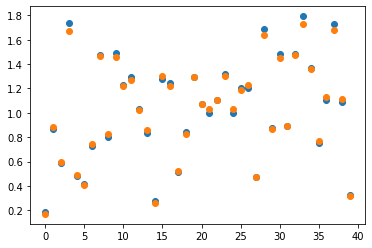

In [ ]:
x = np.ones((100,2))
x[:,0] = np.random.rand(100)
x[:,1] = np.random.rand(100)
y = np.sum(x, axis=1)


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


model = keras.Sequential()
# model.add(Input(1))
model.add(Input(2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*5, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(test_x)

plt.plot(test_y, 'o')
plt.plot(y_, '.')
plt.show()

## 1개 입력 2개 출력

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                20        
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dense_38 (Dense)            (None, 2)                 22        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.306298017501831
2/2 [==============================] - 0s 7ms/step - loss: 7.3515e-04 - mae: 0.0211
loss= 0.0007351514650508761
mae= 0.021054962649941444


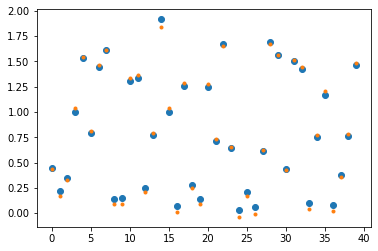

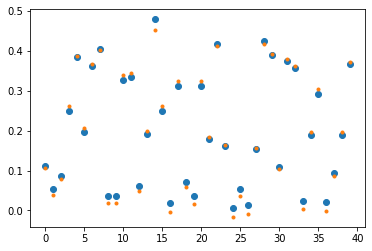

In [ ]:
x = np.random.rand(100)
y = np.zeros((100,2))
y[:,0] = x*2.0
y[:,1] = x/2.0


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(test_x)

plt.plot(test_y[:,0], 'o')
plt.plot(y_[:,0], '.')
plt.show()

plt.plot(test_y[:,1], 'o')
plt.plot(y_[:,1], '.')
plt.show()

## 2개의 입력, 2개의 출력

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                30        
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 2)                 22        
                                                                 
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.60029911994934
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - mae: 0.0367
loss= 0.0037832509260624647
mae= 0.03672429174184799


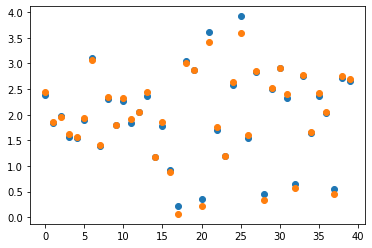

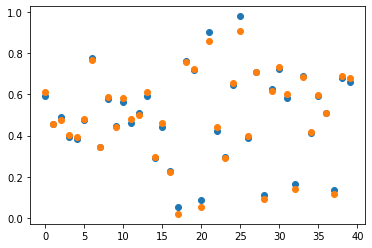

In [ ]:
x = np.ones((100,2))
x[:,0] = np.random.rand(100)
x[:,1] = np.random.rand(100)

z = np.sum(x, axis=1)

y = np.zeros((100,2))
y[:,0] = z*2.0
y[:,1] = z/2.0


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Input(1))
model.add(Input(2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(test_x)

plt.plot(test_y[:,0], 'o')
plt.plot(y_[:,0], 'o')
plt.show()

plt.plot(test_y[:,1], 'o')
plt.plot(y_[:,1], 'o')
plt.show()



# iris 실습

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris.csv

--2021-12-22 01:46:36--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2720 (2.7K) [text/plain]
Saving to: ‘iris.csv.1’

iris.csv.1          100%[===================>]   2.66K  --.-KB/s    in 0s      

2021-12-22 01:46:36 (50.6 MB/s) - ‘iris.csv.1’ saved [2720/2720]



In [ ]:
iris = pd.read_csv("iris.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


In [ ]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 7)
[[6.4 2.8 5.6 2.2 0.  0.  1. ]
 [5.  2.3 3.3 1.  0.  1.  0. ]
 [4.9 2.5 4.5 1.7 0.  0.  1. ]
 [4.9 3.1 1.5 0.1 1.  0.  0. ]
 [5.7 3.8 1.7 0.3 1.  0.  0. ]]


In [ ]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=200, verbose=0)

loss, acc = model.evaluate(test_x, test_y)

print("loss :", loss)
print("acc :", acc)


1/1 [==============================] - 0s 110ms/step - loss: 0.0657 - accuracy: 1.0000
loss : 0.06567320972681046
acc : 1.0


In [ ]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.7595710e-01 2.3804910e-02 2.3808406e-04]
 [4.3952752e-02 9.4221413e-01 1.3833052e-02]
 [9.6556705e-01 3.4113418e-02 3.1953250e-04]
 [2.6106097e-02 9.5873314e-01 1.5160834e-02]
 [9.7418529e-01 2.5575638e-02 2.3913689e-04]
 [9.7904050e-01 2.0748109e-02 2.1140999e-04]
 [9.7950876e-01 2.0286459e-02 2.0486447e-04]
 [9.7911125e-01 2.0683443e-02 2.0530225e-04]
 [5.4592222e-02 9.3359905e-01 1.1808710e-02]
 [9.7285312e-01 2.6887590e-02 2.5930675e-04]
 [4.6243286e-03 3.6860633e-01 6.2676930e-01]
 [2.0889683e-02 9.4132900e-01 3.7781343e-02]
 [9.7315377e-01 2.6583405e-02 2.6270893e-04]
 [2.9584023e-04 2.1141050e-02 9.7856313e-01]
 [9.7224277e-01 2.7512228e-02 2.4500661e-04]
 [1.0933567e-02 8.1195295e-01 1.7711347e-01]
 [2.4799248e-02 9.4303465e-01 3.2166094e-02]
 [9.7238559e-01 2.7354788e-02 2.5969479e-04]
 [9.7633082e-01 2.3431929e-02 2.3728333e-04]
 [2.9650360e-02 9.5748234e-01 1.2867325e-02]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]


# iris_dnn with category index

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris_with_category_index.csv

--2021-12-22 02:12:37--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris_with_category_index.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2218 (2.2K) [text/plain]
Saving to: ‘iris_with_category_index.csv’

iris_with_category_ 100%[===================>]   2.17K  --.-KB/s    in 0s      

2021-12-22 02:12:37 (35.8 MB/s) - ‘iris_with_category_index.csv’ saved [2218/2218]



In [ ]:
iris = pd.read_csv("iris_with_category_index.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 5)
[[6.4 2.8 5.6 2.2 2. ]
 [5.  2.3 3.3 1.  1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.7 3.8 1.7 0.3 0. ]]


In [ ]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(100, 4)
(100, 1)
(20, 4)
(20, 1)


In [ ]:
model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax')) # 1이 아니고 클래스 수 3이다

# model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)
     

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 10)                50        
                                                                 
 dense_72 (Dense)            (None, 10)                110       
                                                                 
 dense_73 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 94ms/step - loss: 0.0360 - accuracy: 1.0000
loss= 0.035996560007333755
acc= 1.0


In [ ]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.93925393e-01 5.92341041e-03 1.51195607e-04]
 [1.07544381e-02 9.87820268e-01 1.42528606e-03]
 [9.69635546e-01 3.00850663e-02 2.79412314e-04]
 [5.68058807e-03 9.92949247e-01 1.37016259e-03]
 [9.96006310e-01 3.86173092e-03 1.32035741e-04]
 [9.96447146e-01 3.42797302e-03 1.24928716e-04]
 [9.97075200e-01 2.80708214e-03 1.17712494e-04]
 [9.97223973e-01 2.66016275e-03 1.15920076e-04]
 [1.72261689e-02 9.81560111e-01 1.21372880e-03]
 [9.93186116e-01 6.65373215e-03 1.60219584e-04]
 [7.10728636e-04 3.65762055e-01 6.33527160e-01]
 [5.13939839e-03 9.90169942e-01 4.69065923e-03]
 [9.90099370e-01 9.71780531e-03 1.82805234e-04]
 [1.48409643e-04 6.43432587e-02 9.35508370e-01]
 [9.96626258e-01 3.24866595e-03 1.25064529e-04]
 [2.36714724e-03 9.51016426e-01 4.66164090e-02]
 [6.12067757e-03 9.91319120e-01 2.56015640e-03]
 [9.94082272e-01 5.76548884e-03 1.52235400e-04]
 [9.93964255e-01 5.88472234e-03 1.51040236e-04]
 [6.30136719e-03 9.92333651e-01 1.36502099e-03]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 